<a href="https://colab.research.google.com/github/saanvi-17/GRIP-task/blob/master/Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Task 2- Prediction using supervised ML
Predict the percentage of marks that a student is expected to score based upon the number of hours they study.

In [20]:
import pandas as pd
import  matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [21]:
#reading the data
url="https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df=pd.read_csv(url)
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [22]:
#to check null characters in the dataset
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

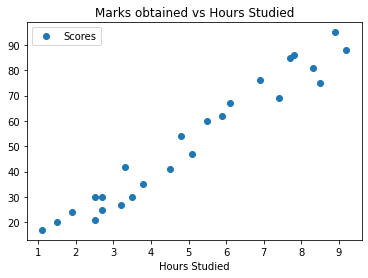

In [23]:
# plotting for the score distribution
df.plot(x='Hours',y='Scores',style='o')
plt.xlabel('Hours Studied')
plt.ylabel=('Scores')
plt.title('Marks obtained vs Hours Studied')
plt.show()

## Data Preparation 

In [24]:
y_data=df['Scores']
x_data=df[['Hours']]

Splitting the data into training and testing data.

In [25]:
x_train, x_test, y_train, y_test= train_test_split(x_data,y_data,test_size=0.2,random_state=0)

print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])


number of test samples : 5
number of training samples: 20


In [26]:
lr= LinearRegression()

In [27]:
lr.fit(x_train,y_train)
print("Training Complete")

Training Complete


/home/kartik/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(0.0, 101.5743900008391)

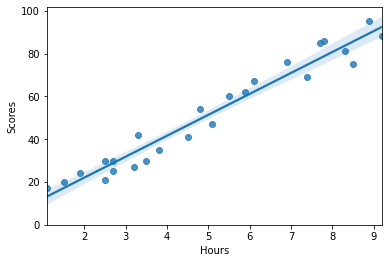

In [28]:
# plotting regression line
sns.regplot(x_data,y_data,data=df)
plt.ylim(0,)

In [29]:
print(x_test)
y_pred = lr.predict(x_test)

    Hours
5     1.5
2     3.2
19    7.4
16    2.5
11    5.9


In [30]:
df2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df2

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


In [31]:
hours = 9.25
own_pred = lr.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737539


### Calculating Mean Absolute error

In [32]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002982


### Mean square error

In [33]:
yhat=lr.predict(x_data)

In [34]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_data, yhat)
print('The mean square error is: ', mse)

The mean square error is:  29.03829976329512
